In [1]:
import numpy as np
import matplotlib.pyplot as plt

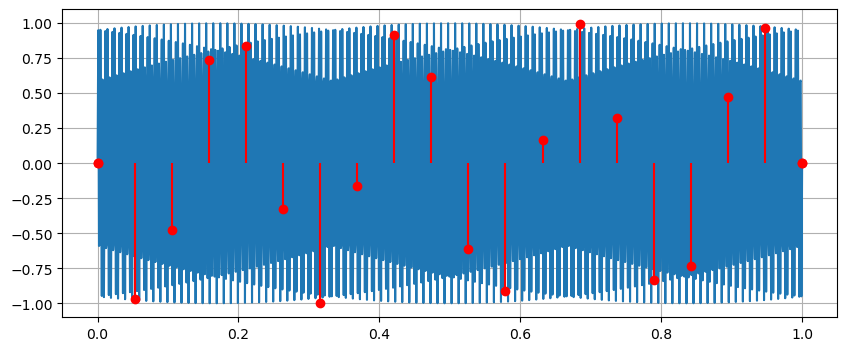

In [3]:
t = np.linspace(0,1,1000)
analog_signal = np.sin(2*np.pi*300*t)

sampled_t = np.linspace(0,1,20)
sampled_signal = np.sin(2*np.pi*300*sampled_t)

plt.figure(figsize=(10,4))
plt.plot(t,analog_signal)
plt.stem(sampled_t,sampled_signal,linefmt='r-',markerfmt='ro',basefmt='ro')
plt.grid()
plt.show()

In [4]:
import librosa
import librosa.display
from IPython.display import Audio

y, sr = librosa.load(librosa.ex('trumpet'))
Audio(y,rate=sr)

ModuleNotFoundError: No module named 'librosa'

In [5]:
!pip install librosa

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- --------------------

In [6]:
import librosa
import librosa.display
from IPython.display import Audio

y, sr = librosa.load(librosa.ex('trumpet'))
Audio(y,rate=sr)

C:\Users\rajat\.anaconda\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\rajat\.anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\rajat\.anaconda\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


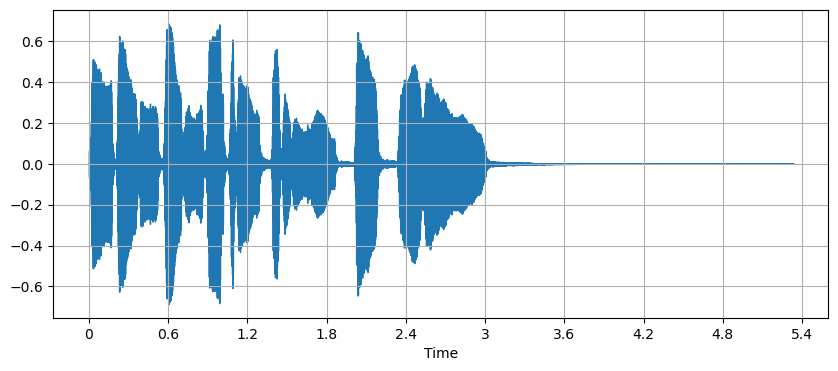

In [7]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(y,sr=sr)
plt.grid()
plt.show()

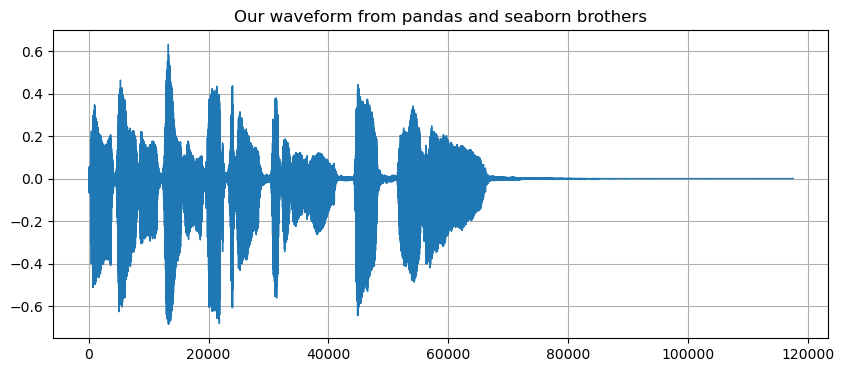

In [9]:
import seaborn as sns
import pandas as pd
color_pal = sns.color_palette()
pd.Series(y).plot(figsize=(10,4),
                  lw=1,
                  title="Our waveform from pandas and seaborn brothers",
                  color=color_pal[0])
plt.grid()
plt.show()

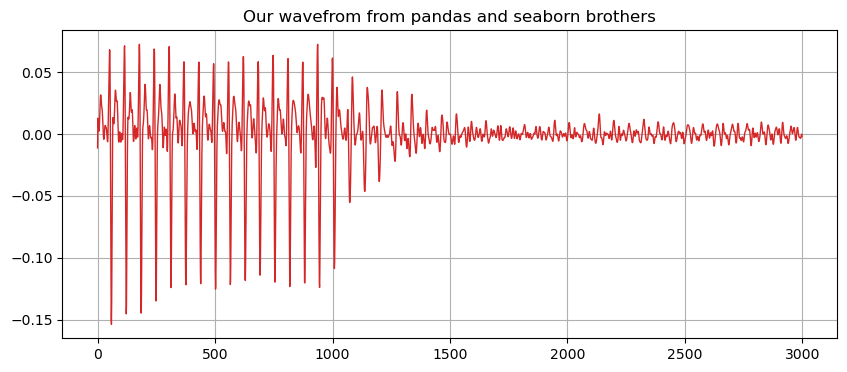

In [11]:
y_trimmed,_ = librosa.effects.trim(y,top_db=20)
pd.Series(y_trimmed[40000:43000]).plot(figsize=(10,4),
                                       lw=1,
                                       title="Our wavefrom from pandas and seaborn brothers",
                                       color=color_pal[3])
plt.grid()
plt.show()

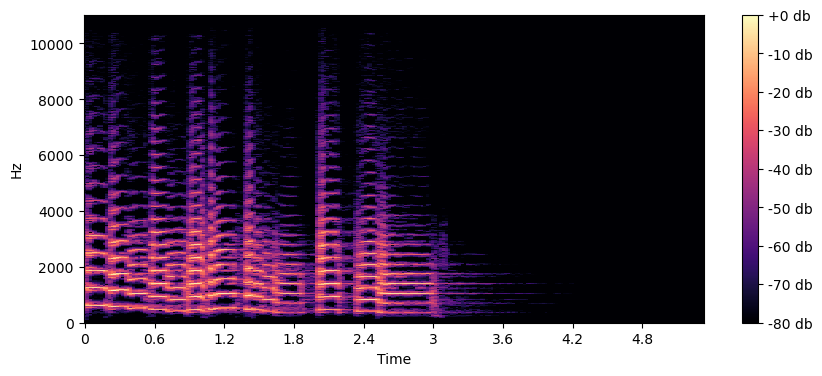

In [12]:
D=librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(D,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar(format='%+2.0f db')
plt.show()

In [14]:
!pip install librosa soundfile

In [19]:
!pip install ipywebrtc

In [21]:
from ipywebrtc import AudioRecorder, CameraStream
from IPython.display import display, Audio

stream = CameraStream(constraints={'audio': True, 'video': False})
recorder = AudioRecorder(stream=stream)

display(stream)
display(recorder)

CameraStream(constraints={'audio': True, 'video': False})

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': …

In [22]:
!pip install sounddevice soundfile

In [26]:
import sounddevice as sd

print(sd.query_devices())

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (Iriun Webcam), MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (4 in, 0 out)
   3 Microphone (DroidCam Virtual Au, MME (1 in, 0 out)
   4 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  5 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   6 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   7 Microphone (Iriun Webcam), Windows DirectSound (2 in, 0 out)
   8 Microphone Array (Realtek(R) Audio), Windows DirectSound (4 in, 0 out)
   9 Microphone (DroidCam Virtual Audio), Windows DirectSound (1 in, 0 out)
  10 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
  11 Speakers (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  12 Speakers (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  13 Microphone Array (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  14 Microphone (Iriun Webcam), Windows WASAPI (2 in, 0 out)
  15 Microphone (DroidCam Virtual Audio), Windows WASAPI (1 in, 

In [27]:
import sounddevice as sd
import soundfile as sf
from IPython.display import Audio

# Set default input device to Realtek Microphone Array (MME)
sd.default.device = (2, None)  # (input_index, output_index). Use `None` to leave output as default

# Recording parameters
duration = 5  # seconds
samplerate = 44100

print("Recording...")
audio = sd.rec(frames=int(duration * samplerate), samplerate=samplerate, channels=1, dtype='float32')
sd.wait()
print("Recording complete.")

# Save and play
sf.write('my_voice.wav', audio, samplerate)
Audio('my_voice.wav')

Recording...
Recording complete.


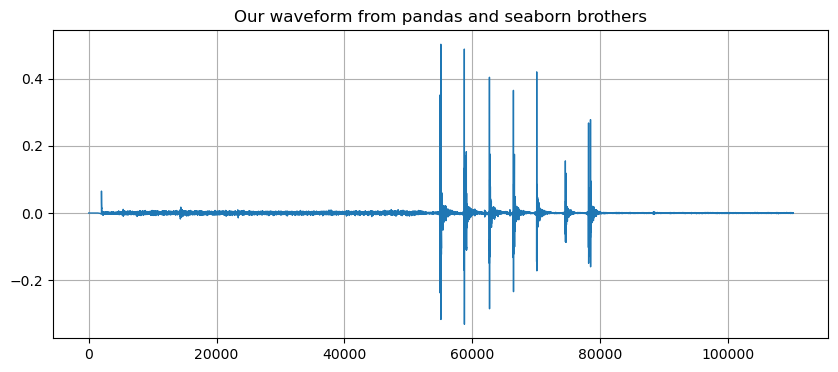

In [28]:
y, sr = librosa.load("my_voice.wav")

pd.Series(y).plot(figsize=(10,4),
                  lw=1,
                  title="Our waveform from pandas and seaborn brothers",
                  color=color_pal[0])
plt.grid()
plt.show()


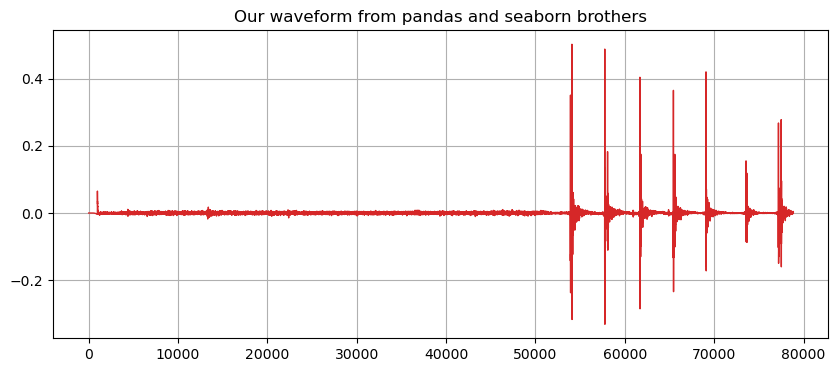

In [29]:
y_trimmed,_ =librosa.effects.trim(y,top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,4),
                  lw=1,
                  title="Our waveform from pandas and seaborn brothers",
                  color=color_pal[3])
plt.grid()
plt.show()

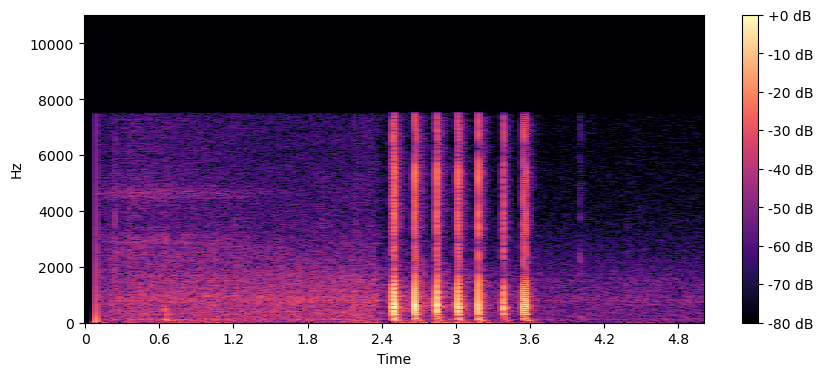

In [30]:
D=librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(D,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar(format='%+2.0f dB')
plt.show()